In [1]:
from data_load import *
from model import DDI_model

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarn

In [2]:
import tensorflow as tf
from keras import backend as K

import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.3
session = tf.Session(config=config)
K.set_session(session)

In [3]:
np.random.seed(3)
tf.random.set_random_seed(3)

### DDI model 

In [4]:
ddi_model = DDI_model(model_save_path='/DAS_Storage3/eykim/DDI/202111/', model_name='test')

/home/eykim/backup_20190214/model.py:36: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="elu", units=978)`
  shared_layer.add(Dense(output_dim=self.input_drug_dim, activation=self.drug_activation))
/home/eykim/backup_20190214/model.py:53: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_regularizer=<keras.reg..., activation="elu", units=100)`
  shared_layer2.add(Dense(output_dim=self.drug_emb_dim, kernel_regularizer=l2(0.001), activation=self.drug_activation))


In [5]:
ddi_model.load_model(model_load_path='/DAS_Storage3/eykim/DDI/202111/test/', model_name='model_changed_loss_weights.h5', threshold_name='model_changed_loss_opt_threshold.csv')

#### load data

In [6]:
train_data, test_x, test_y = load_data()
ts_exp = load_exp()

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Including reverse pairs:  (16473930, 4)


#### train model

In [ ]:
ddi_model.train(train_data=temp, exp_df=ts_exp, split_frac=0.1, sampling_size=1)

#### test

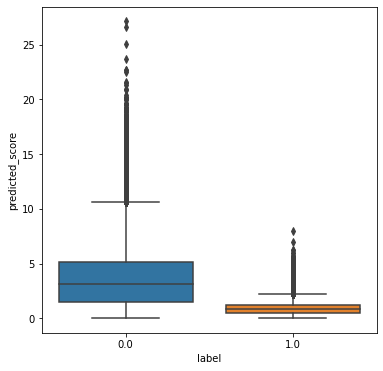

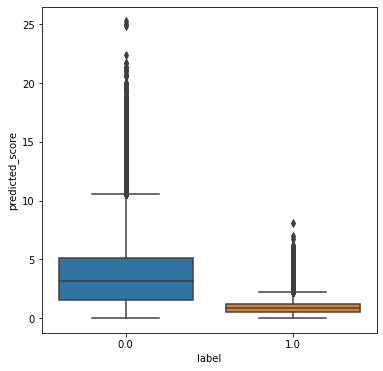

Test set predicted === 
AUC: 0.891, AUPR: 0.917


(         drug1    drug2   SE  label  predicted_label_x  predicted_label_y  \
 0         5035  4659568    0    1.0                  0                  0   
 1         2162     4893    0    1.0                  0                  1   
 2         3075     5078    0    1.0                  0                  0   
 3         2471     3937    0    1.0                  1                  1   
 4         3016     4819    0    1.0                  0                  0   
 5         4614     4635    0    1.0                  1                  1   
 6         3911    62924    0    1.0                  1                  1   
 7         4547    60835    0    1.0                  1                  1   
 8         2471   123620    0    1.0                  0                  0   
 9         3016     3345    0    1.0                  1                  1   
 10        3016     4170    0    1.0                  0                  0   
 11        2173     5651    0    1.0                  1         

In [9]:
prediced_label, ddi_model.test(test_x=test_x, test_y=test_y, exp_df=ts_exp)